In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as st
import matplotlib.pyplot as plt 
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

impianti = pd.read_csv('impianti.csv', sep = ';', decimal=".", parse_dates=True)
#impianti

#memorizzate in selezione gli impianti installati dopo il 2000 e prima del 2019
app = impianti[impianti['GENERATORE_DATA_INST'] > 2000]
selezione = app[app['GENERATORE_DATA_INST'] < 2019]
#selezione

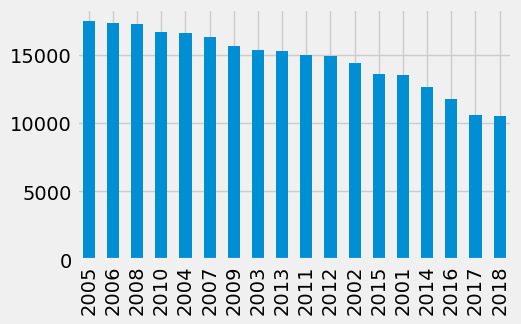

In [3]:
#4.1 Tracciate un grafico del carattere GERERATORE_DATA_INST
selezione.GENERATORE_DATA_INST.value_counts().plot.bar()
plt.show()

In [4]:
#4.2 Eterogeneità di GENERATORE_DATA_INST
print('eterogeneità pari agli anni presi in considerazione in questa selezione')

eterogeneità pari agli anni presi in considerazione in questa selezione


In [10]:
#4.3 Tabella frequenze relative di ISPEZIONE_ESITO
esito_rel = pd.crosstab(index = selezione.ISPEZIONE_ESITO, columns = 'Frequenze relative', normalize= 'all', colnames=[''])
esito_rel

,Frequenze relative
ISPEZIONE_ESITO,
Negativo,0.236387
Positivo,0.763613


In [11]:
#4.4 Tabelle frequenze relative di ISPEZIONE_ESITO con anche i valori mancanti
esito_rel2 = pd.crosstab(index = selezione.ISPEZIONE_ESITO.dropna(), columns = 'Frequenze relative', normalize= 'all', colnames=[''])
esito_rel2

,Frequenze relative
ISPEZIONE_ESITO,
Negativo,0.236387
Positivo,0.763613


In [12]:
#4.5 Percentuale di impianti ispezionati con esito positivo dell'ispezione
(len(selezione[selezione['ISPEZIONE_ESITO'] == 'Positivo'])/len(selezione))*100

76.3613385143547

In [4]:
'''
4.6
L'impianto termico del mio condominio è stato installato qualche anno fa, un anno successivo al 2000.
Non è stato ancora ispezionato. Stimare la probabilità che, quando verrà ispezionato, l'impianto 
ottenga esito positivo
'''

p = len(selezione[selezione['ISPEZIONE_ESITO'] == 'Positivo'])/len(selezione)
p

0.763613385143547

In [19]:
#4.7 Taglia campione usato prima ?
len(selezione)

265070

In [20]:
#4.8 Stimatore usato prima ?
print('La media campionaria')

La media campionaria


In [14]:
'''
4.9
Condizione sufficiente per la taglia n affinchè non sia inferiore a 0.95 la probabilità 
P(|Tn-p| <= 0.01)
'''
import math
z = st.norm()
sigma = (math.sqrt(p*(1-p)))/0.01
n = (z.ppf(0.525)*sigma)**2
n*n

50.379142579666826